In [20]:
import os
import json
import warnings
import matplotlib.pyplot as plt
from itertools import zip_longest
import seaborn as sns
import pandas as pd

warnings.filterwarnings("ignore")

In [2]:
from util import (
    ticker_option, combine_dfs, get_stock_price, 
    prepare_ml_dataset, concatenate_strings, train_model,
    view_shap_value_for_instance
)

In [3]:
use_cache = True

In [4]:
if os.path.exists('price.json') & use_cache:
    # Read the dictionary from the JSON file
    with open('price.json', 'r') as json_file:
        price_dict = json.load(json_file)
else:
    price_dict = {}

In [5]:
len(price_dict)

20

In [6]:
# top 20+ tickers
ticker_list = [
    "MSFT", "AAPL", "NVDA", "AMZN", "META", "GOOGL", "GOOG", "BRK.B", "LLY", "AVGO", "JPM", 
    "XOM", "TSLA", "UNH", "V", "PG", "MA", "COST", "JNJ", "HD", "MRK",
]
df = combine_dfs(ticker_list, price_dict)
df

MSFT
AAPL
NVDA
AMZN
META
GOOGL
GOOG
BRK.B
No options found for BRK.B
LLY
AVGO
JPM
XOM
TSLA
UNH
V
PG
MA
COST
JNJ
HD
MRK


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,exp,days_to_exp,stockPrice,option_ticker
0,AMZN240621P01540000,2022-04-27,1540.0,138.00,114.5,130.5,0.0,0.0,1.0,1.0,0.000010,True,REGULAR,USD,put,2024-06-21,785.21,138.17,AMZN
1,AMZN240621C01840000,2022-04-28,1840.0,1223.65,774.0,793.0,0.0,0.0,2.0,2.0,0.000000,False,REGULAR,USD,call,2024-06-21,784.43,144.60,AMZN
2,AMZN240621P01660000,2022-04-28,1660.0,84.30,145.0,161.0,0.0,0.0,3.0,2.0,0.000010,True,REGULAR,USD,put,2024-06-21,784.29,144.60,AMZN
3,AMZN240621C01640000,2022-04-29,1640.0,1114.45,904.0,922.0,0.0,0.0,2.0,2.0,0.000000,False,REGULAR,USD,call,2024-06-21,783.39,124.28,AMZN
4,AMZN240621C01740000,2022-04-29,1740.0,998.00,838.0,856.0,0.0,0.0,1.0,1.0,0.000000,False,REGULAR,USD,call,2024-06-21,783.18,124.28,AMZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39971,GOOG240719P00175000,2024-05-31,175.0,6.20,0.0,0.0,0.0,0.0,156.0,0.0,0.000010,True,REGULAR,USD,put,2024-07-19,48.18,173.93,GOOG
39972,GOOG240719P00170000,2024-05-31,170.0,4.05,0.0,0.0,0.0,0.0,196.0,0.0,0.015635,False,REGULAR,USD,put,2024-07-19,48.18,173.93,GOOG
39973,GOOG240719P00165000,2024-05-31,165.0,2.30,0.0,0.0,0.0,0.0,226.0,0.0,0.031260,False,REGULAR,USD,put,2024-07-19,48.17,173.93,GOOG
39974,GOOG240719P00155000,2024-05-31,155.0,0.79,0.0,0.0,0.0,0.0,244.0,0.0,0.062509,False,REGULAR,USD,put,2024-07-19,48.17,173.93,GOOG


In [7]:
# save to json
with open('price.json', 'w') as json_file:
    json.dump(price_dict, json_file, indent=4)

In [8]:
df =  prepare_ml_dataset(df)
df

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice
0,1540.0,0.0,0.0,1.0,1.0,0.000010,1,785.21,138.17,0,1,138.00
1,1840.0,0.0,0.0,2.0,2.0,0.000000,0,784.43,144.60,1,0,1223.65
2,1660.0,0.0,0.0,3.0,2.0,0.000010,1,784.29,144.60,0,1,84.30
3,1640.0,0.0,0.0,2.0,2.0,0.000000,0,783.39,124.28,1,0,1114.45
4,1740.0,0.0,0.0,1.0,1.0,0.000000,0,783.18,124.28,1,0,998.00
...,...,...,...,...,...,...,...,...,...,...,...,...
22511,100.0,0.0,0.0,13.0,0.0,0.000010,1,76.22,173.93,1,0,73.34
22512,195.0,0.0,0.0,18.0,0.0,0.000010,1,48.37,173.93,0,1,22.90
22513,190.0,0.0,0.0,31.0,0.0,0.000010,1,48.19,173.93,0,1,17.57
22514,185.0,0.0,0.0,2.0,0.0,0.000010,1,48.38,173.93,0,1,13.75


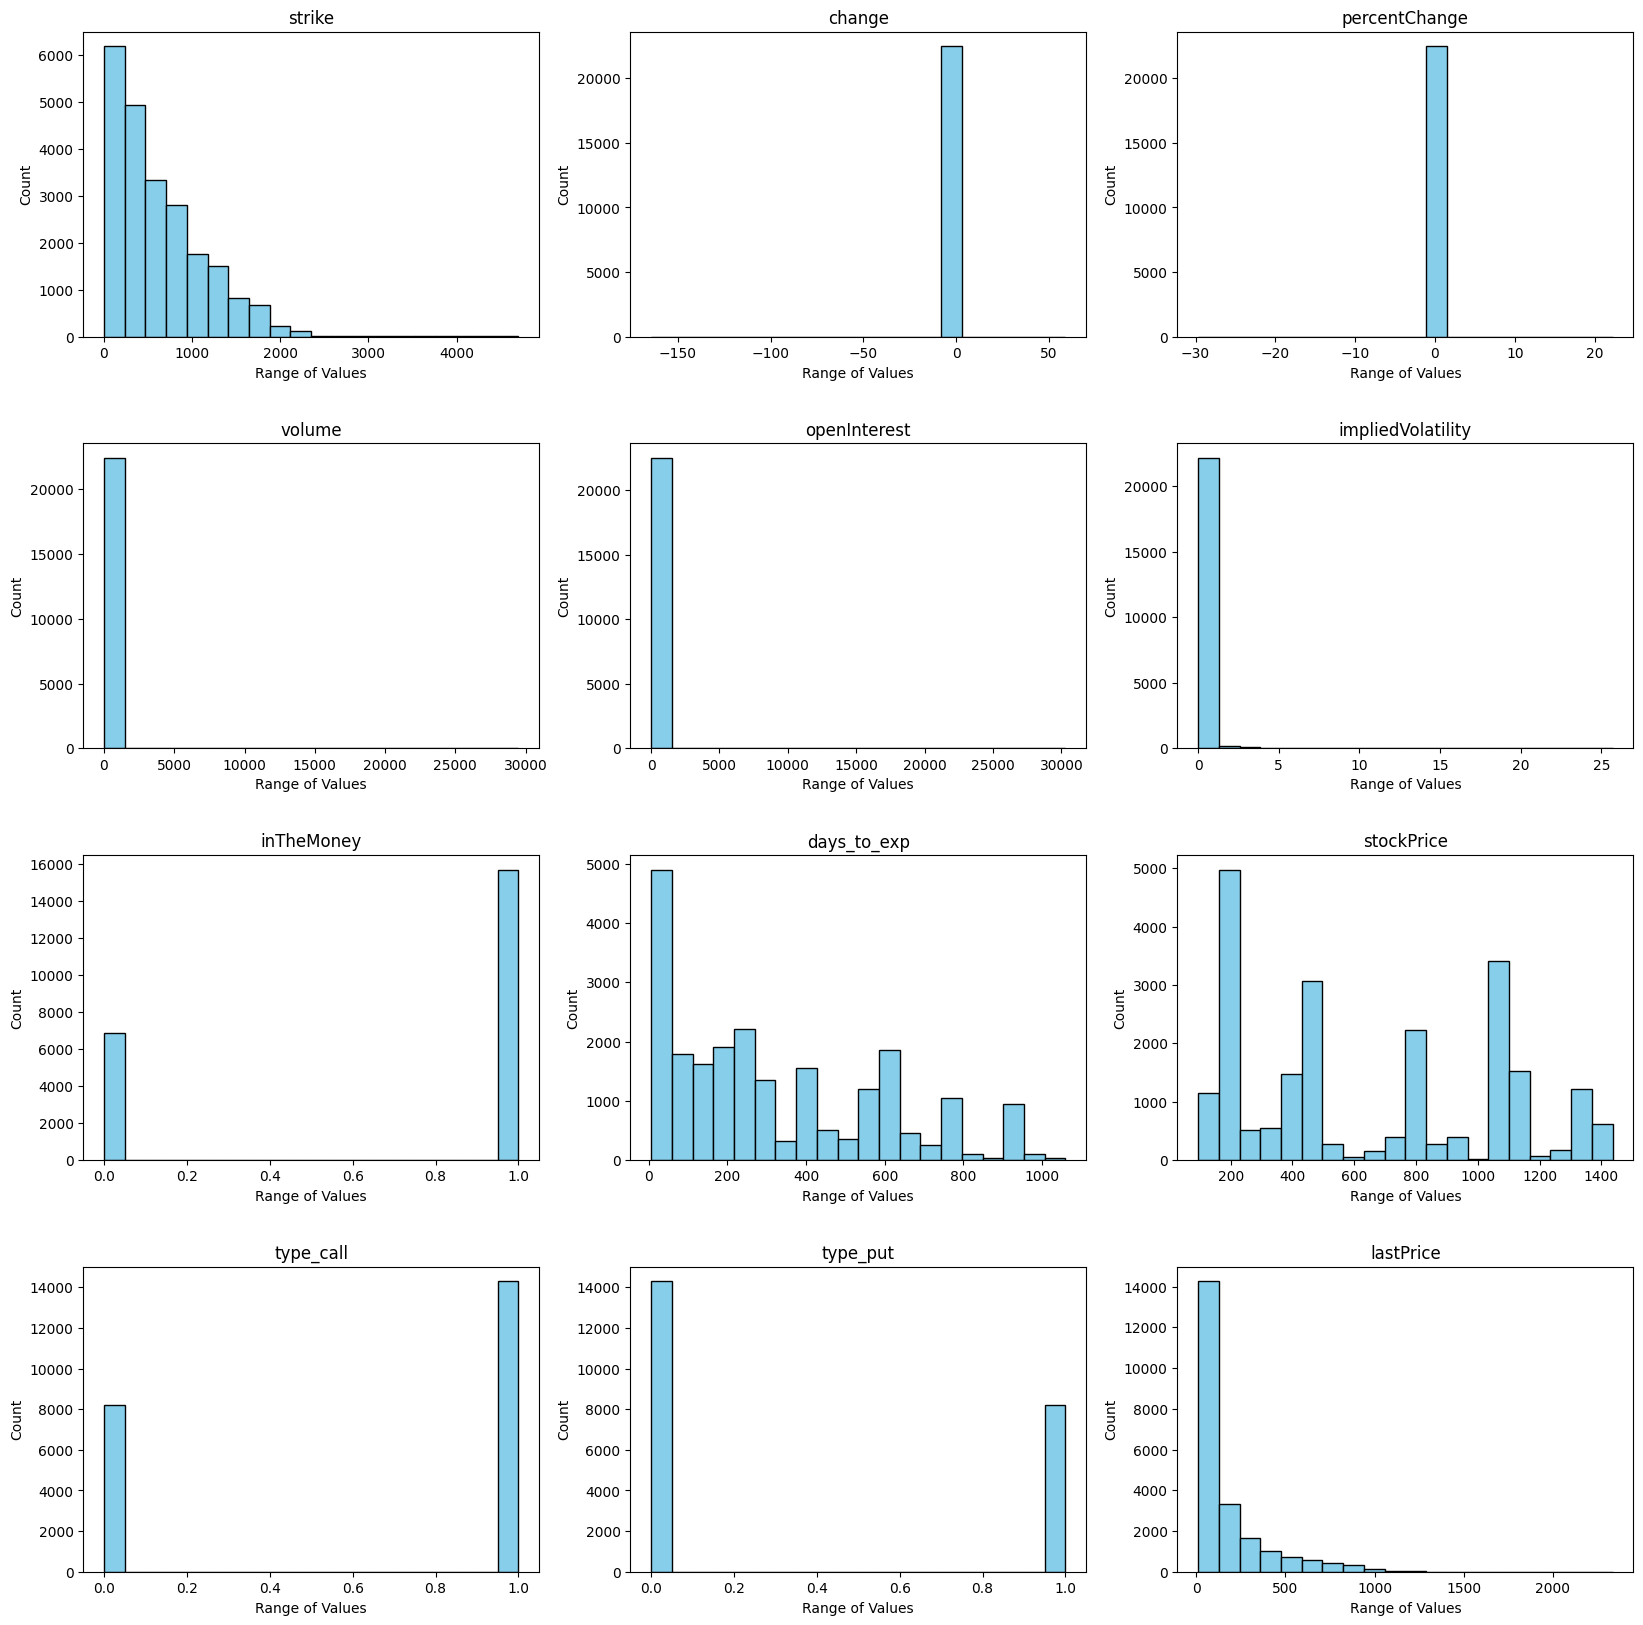

In [16]:
# Histogram plot of features
fig, axes = plt.subplots(4, 3, figsize=(20, 20), gridspec_kw={'hspace': 0.35})

axes_flat = axes.flatten()

for ax, col in zip_longest(axes_flat, df.iloc[:, :].columns):
    if col != None:
        ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f"{col}")
        ax.set_xlabel('Range of Values')
        ax.set_ylabel('Count')
    else:
        ax.axis("off")

plt.show()

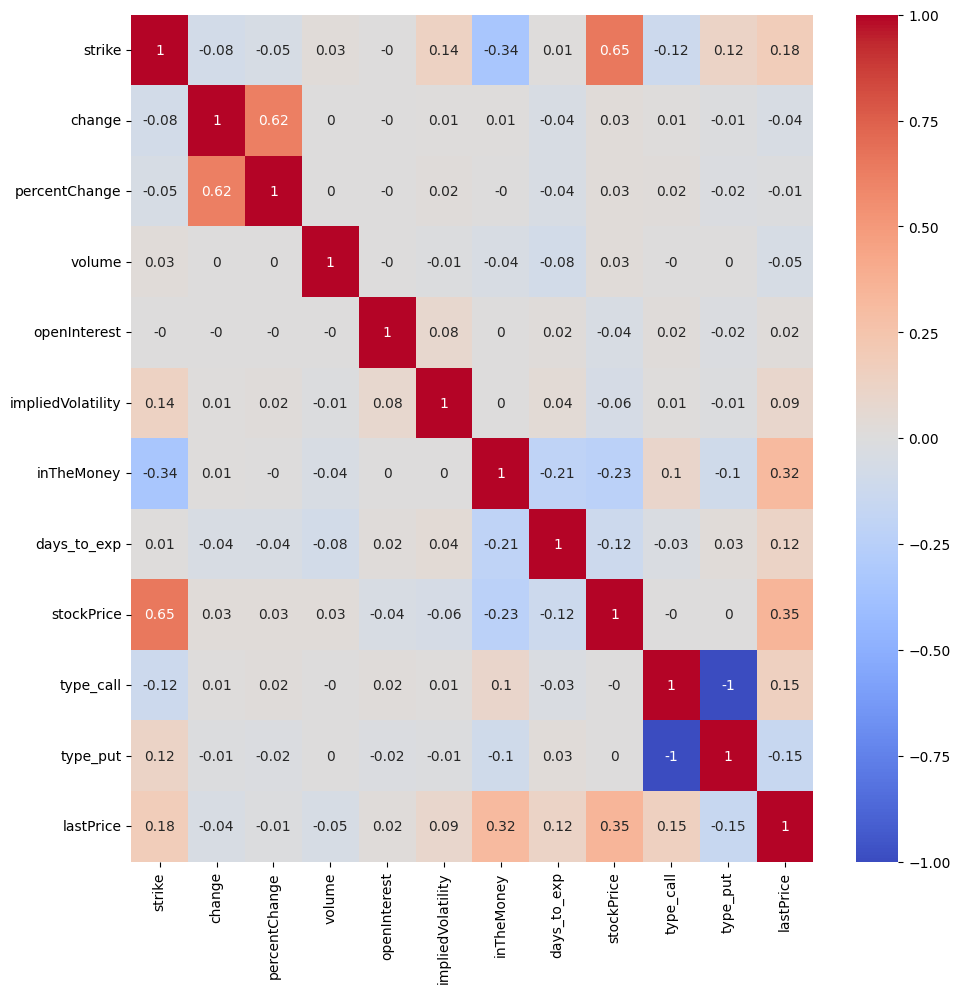

In [25]:
plt.figure(figsize = (11, 11))
sns.heatmap(round(pd.DataFrame(df, columns=df.columns).corr(), 2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22516 entries, 0 to 22515
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   strike             22516 non-null  float64
 1   change             22516 non-null  float64
 2   percentChange      22516 non-null  float64
 3   volume             22516 non-null  float64
 4   openInterest       22516 non-null  float64
 5   impliedVolatility  22516 non-null  float64
 6   inTheMoney         22516 non-null  int32  
 7   days_to_exp        22516 non-null  float64
 8   stockPrice         22516 non-null  float64
 9   type_call          22516 non-null  int32  
 10  type_put           22516 non-null  int32  
 11  lastPrice          22516 non-null  float64
dtypes: float64(9), int32(3)
memory usage: 1.8 MB


In [11]:
# check if any of the column values is null
df[df.isna().any(axis=1)]

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice


bests:
{'clf': GradientBoostingRegressor(), 'clf__max_depth': 4, 'clf__n_estimators': 250}
0.9755320463513778


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.975532
1,GradientBoostingRegressor()_4_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.971520
2,GradientBoostingRegressor()_3_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.953422
3,GradientBoostingRegressor()_3_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.945443
4,GradientBoostingRegressor()_2_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.883410
5,GradientBoostingRegressor()_2_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.873494
6,RandomForestRegressor()_4_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.739675
7,RandomForestRegressor()_4_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.739494
8,DecisionTreeRegressor()_4,"{'clf': DecisionTreeRegressor(), 'clf__max_dep...",0.722925
9,RandomForestRegressor()_3_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.633278


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.975532


model performance:
0.9734848202327536
19.360710309457957
1181.7465897710601


,Predict,Actual
0,82.644667,80.50
1,58.499926,40.36
2,52.669290,40.00
3,185.618239,219.30
4,88.831112,124.82
...,...,...
5624,16.533499,28.70
5625,190.317603,211.00
5626,162.680528,162.01
5627,52.963437,13.50


 98%|===================| 5526/5629 [00:32<00:00]        

shap summary plots


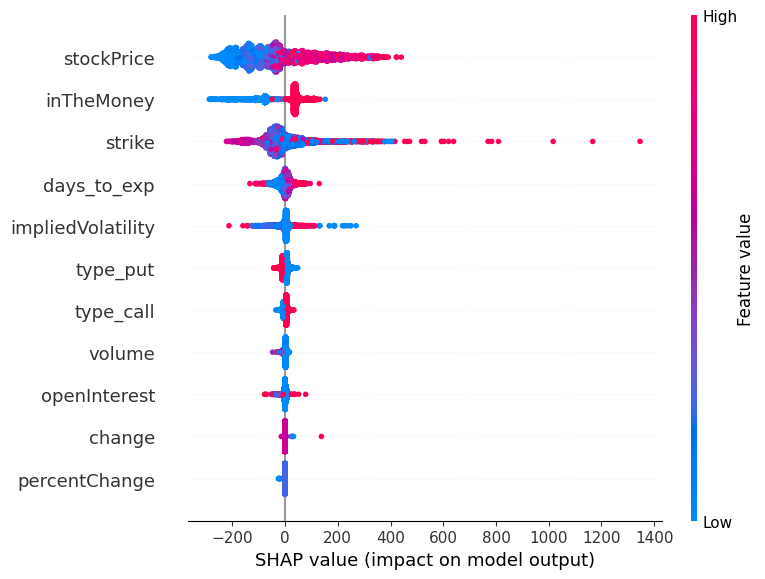

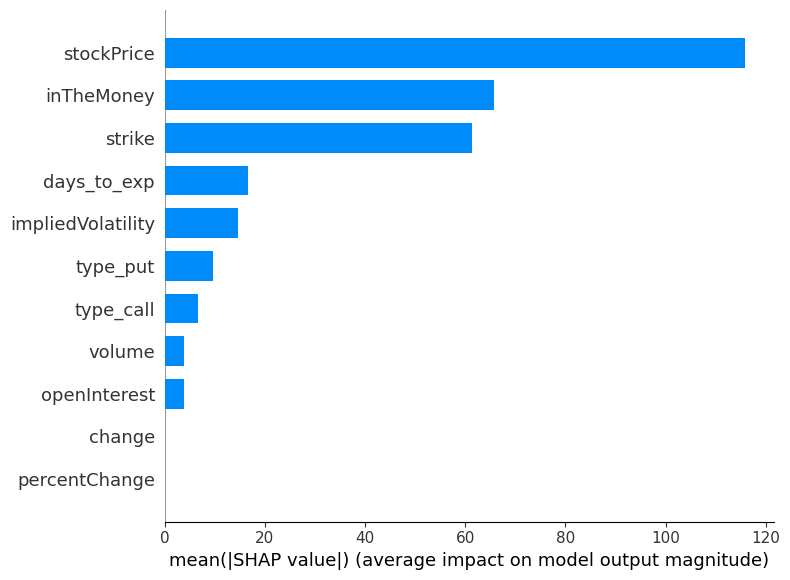

Top 5 features - shap values vs. feature values


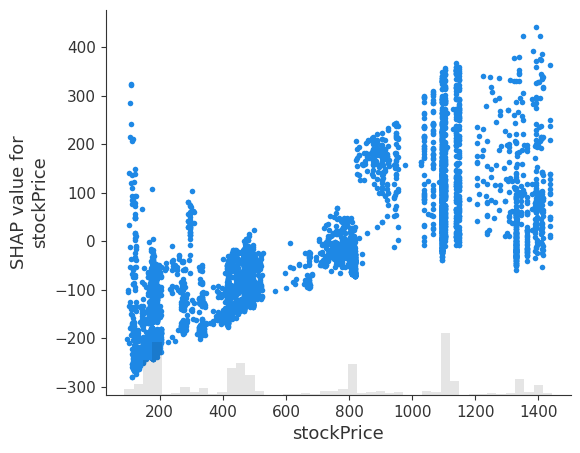

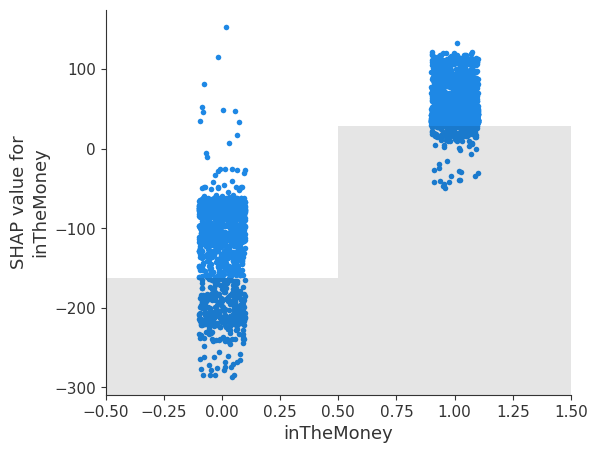

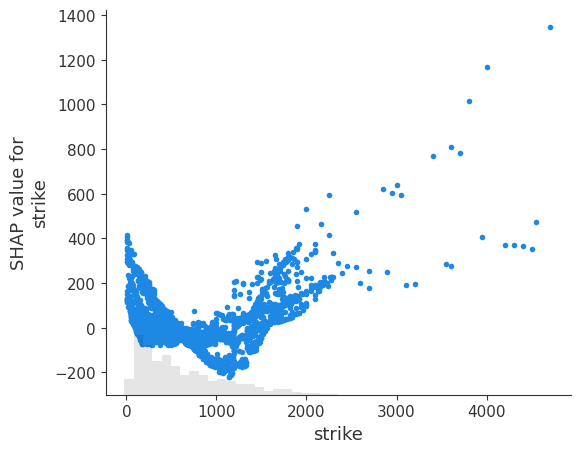

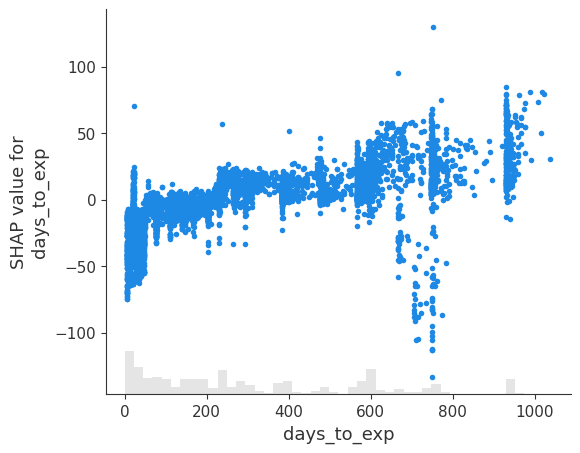

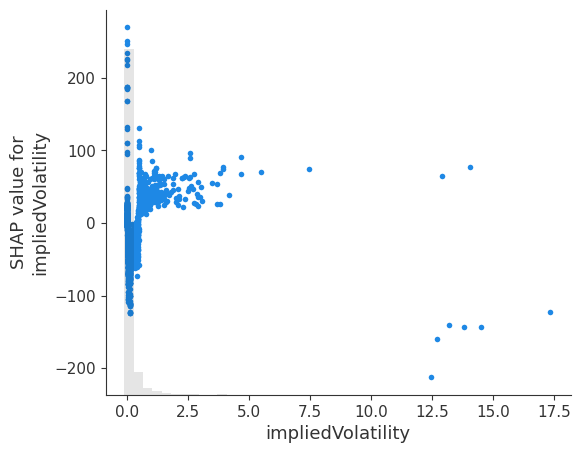

In [12]:
X_test, y_test, shap_values, X, shap_explainer, bm = train_model(df)

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
1839,60.0,0.0,0.0,15.0,33.0,0.00001,1,651.23,135.24,1,0


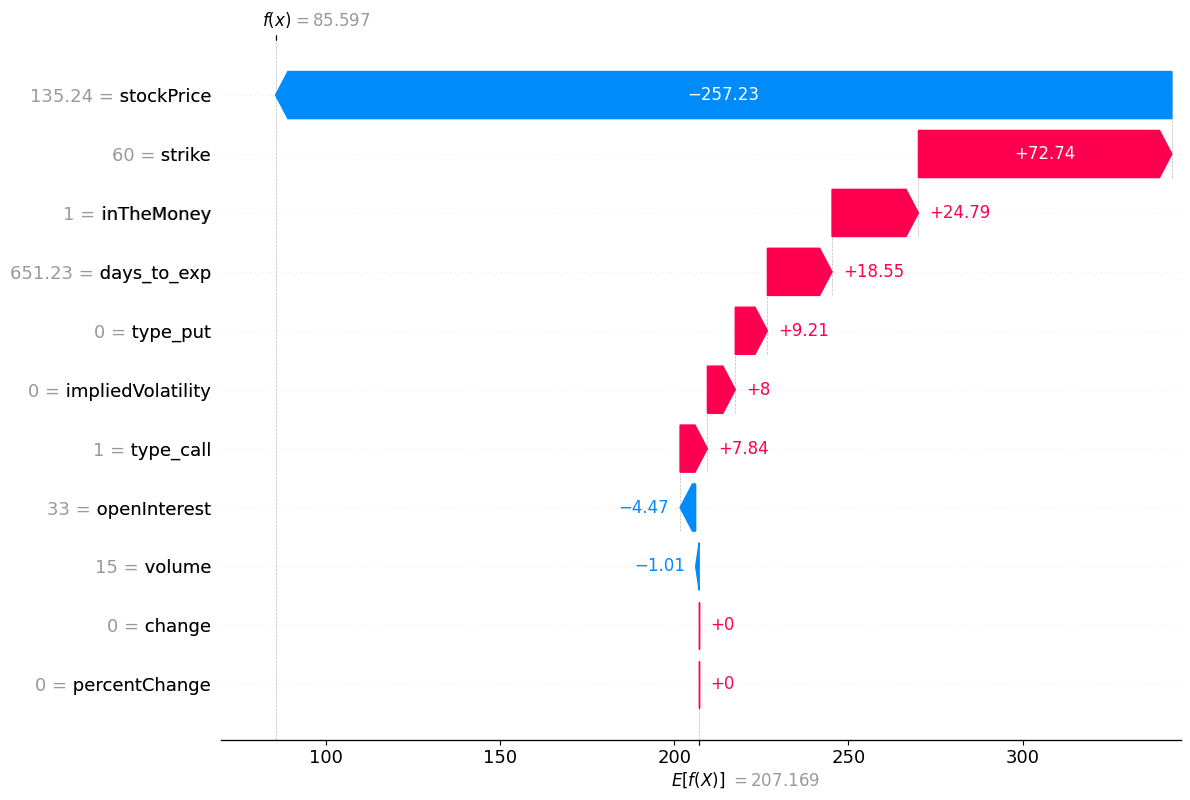

predict
85.59707973545477
actual
80.5


In [13]:
view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
21930,775.0,0.0,0.0,1.0,0.0,0.00001,1,6.23,820.34,1,0


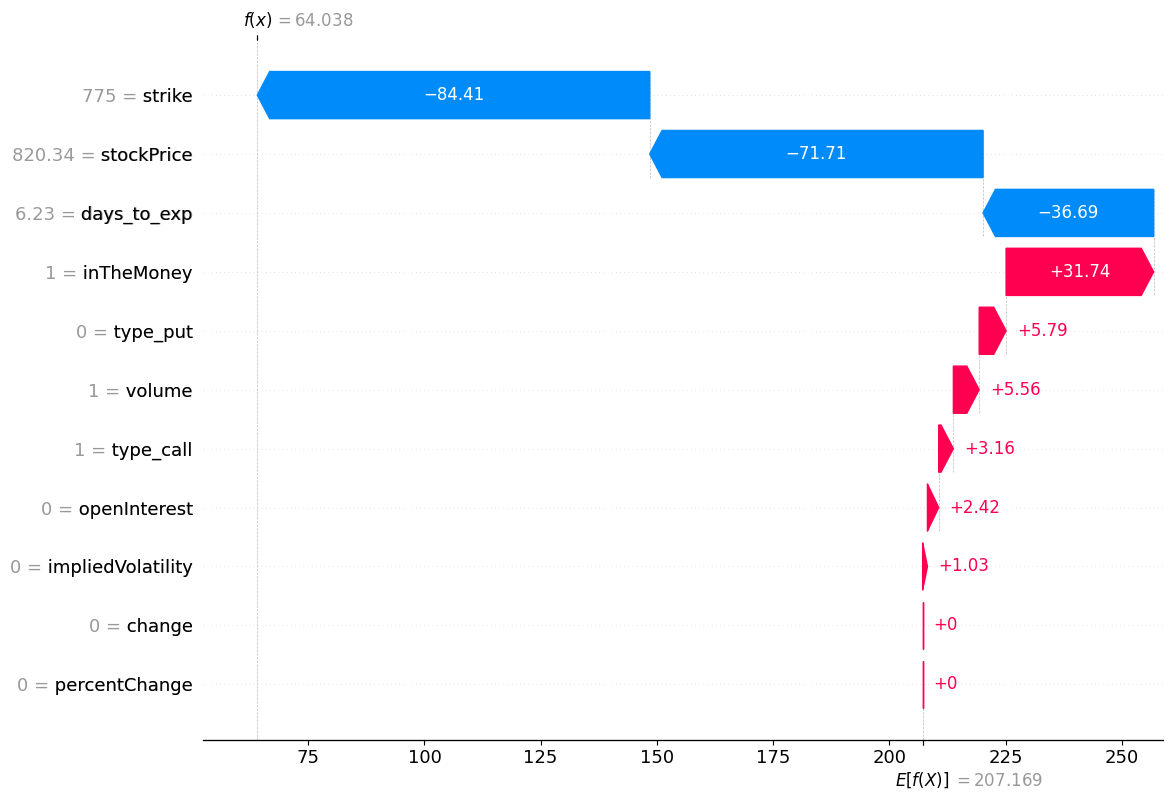

predict
64.03829186783429
actual
40.36


In [14]:
view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 1)

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
15785,370.0,0.0,0.0,5.0,0.0,0.00001,1,34.27,415.61,1,0


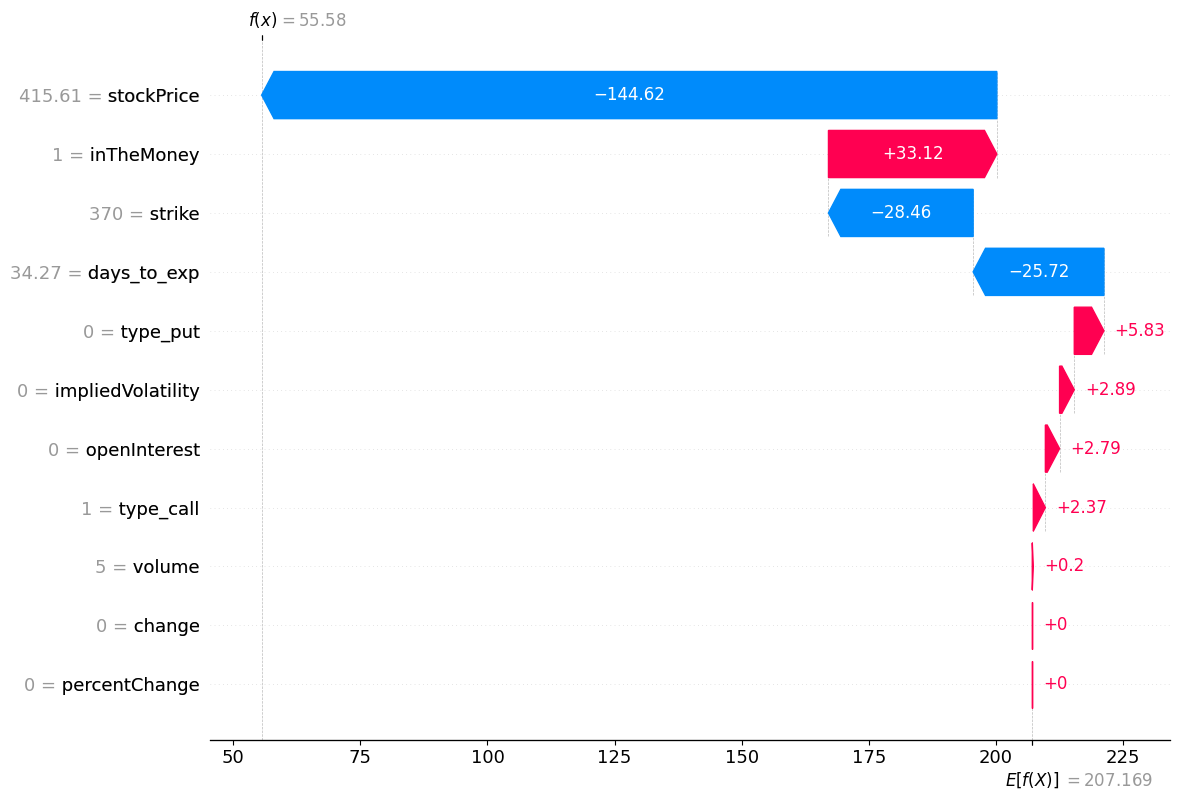

predict
55.580481101326896
actual
40.0


In [15]:
view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 2)